In [31]:
import tensorflow as tf
import numpy as np
import t3f
tf.set_random_seed(0)
np.random.seed(0)
%matplotlib inline
import matplotlib.pyplot as plt
import metric_util as mt
import data_util as du
from t3f import shapes
from nilearn import image
from tensorflow.python.util import nest
import copy
from nilearn import plotting
from t3f import ops
import mri_draw_utils as mrd
from t3f import initializers
from t3f import approximate
from scipy import optimize 
from nilearn.masking import compute_background_mask
from nilearn.masking import compute_epi_mask
from collections import OrderedDict
import pandas as pd
from scipy import stats
from nilearn.image import math_img
from t3f import initializers
import numpy.testing as nps
from dipy.sims.voxel import add_noise
import nibabel as nib
from dipy.sims.voxel import add_noise
import noise_util as nu

In [4]:
subject_scan_path = du.get_full_path_subject1()
print "Subject Path: " + str(subject_scan_path)
x_true_org = mt.read_image_abs_path(subject_scan_path)
ground_truth = np.array(x_true_org.get_data()).astype('float32')
ten_ones = np.ones_like(ground_truth).astype('float32')
ten_zeros = np.zeros_like(ground_truth).astype('float32')

Subject Path: /work/pl/sch/analysis/data/COBRE001/swaAMAYER+cobre01_63001+M87100944+20110309at135133+RSTpre_V01_R01+CM.nii


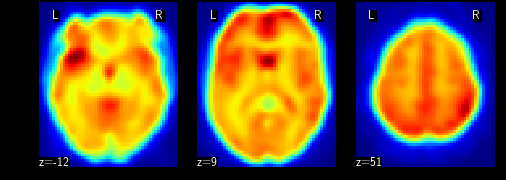

In [22]:
x_hat_img = mt.reconstruct_image_affine(x_true_org, ground_truth)
x_hat = image.index_img(x_hat_img,1)
recovered_image = plotting.plot_epi(x_hat, bg_img=None,black_bg=True, display_mode='z', cmap='jet', cut_coords = 3)

In [35]:
noise_data = add_richian_noise(ground_truth, 10**9)

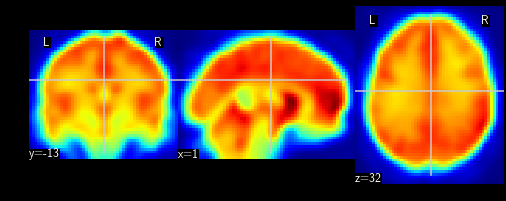

In [39]:
x_hat_img = mt.reconstruct_image_affine(x_true_org, noise_data)
x_hat = image.index_img(x_hat_img,1)
recovered_image = plotting.plot_epi(x_hat, bg_img=None,black_bg=True, cmap='jet')

In [38]:
nps.assert_allclose(noise_data, ground_truth, rtol=1e-4, atol=0)

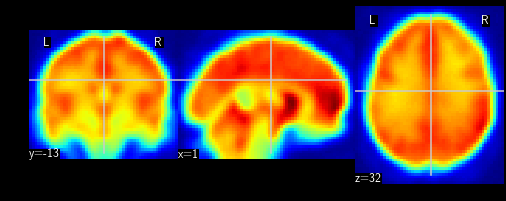

In [48]:
x_init = ground_truth
norm_ground_x_init = np.linalg.norm(x_init)
x_init = x_init * (1./norm_ground_x_init)
signal_w_noise = add_richian_noise(x_init, 12**2)
norm_ground_noise = np.linalg.norm(signal_w_noise)
signal_w_noise = signal_w_noise * (1./norm_ground_noise)
x_hat_img = mt.reconstruct_image_affine(x_true_org, signal_w_noise)
x_hat = image.index_img(x_hat_img,1)
recovered_image = plotting.plot_epi(x_hat, bg_img=None,black_bg=True, cmap='jet', cut_coords=None)

In [40]:
def add_richian_noise(img, snr):
    signal = img.reshape(-1)
    signal_mean = signal.mean() 
    noise_img = add_noise(img, snr, signal_mean, noise_type='rician')
    return  noise_img